<a href="https://colab.research.google.com/github/Val-70/bank-data/blob/main/bank-full.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [333]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


data = pd.read_csv("bank.csv", na_values =['NA'])
data = pd.DataFrame(data)
data.head(9)




,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no
5,35,management,single,tertiary,no,747,no,no,cellular,23,feb,141,2,176,3,failure,no
6,36,self-employed,married,tertiary,no,307,yes,no,cellular,14,may,341,1,330,2,other,no
7,39,technician,married,secondary,no,147,yes,no,cellular,6,may,151,2,-1,0,unknown,no
8,41,entrepreneur,married,tertiary,no,221,yes,no,unknown,14,may,57,2,-1,0,unknown,no


In [334]:
data.shape

(4521, 17)

In [335]:
def categorize(df):
  new_df = df.copy()
  le = preprocessing.LabelEncoder()
  new_df['job'] = le.fit_transform(new_df['job'])
  new_df['marital'] = le.fit_transform(new_df['marital'])
  new_df['education'] = le.fit_transform(new_df['education'])
  new_df['default'] = le.fit_transform(new_df['default'])
  new_df['housing'] = le.fit_transform(new_df['housing'])
  new_df['month'] = le.fit_transform(new_df['month'])
  new_df['loan'] = le.fit_transform(new_df['loan'])
  new_df['contact'] = le.fit_transform(new_df['contact'])
  new_df['day'] = le.fit_transform(new_df['day'])
  new_df['poutcome'] = le.fit_transform(new_df['poutcome'])
  new_df['y'] = le.fit_transform(new_df['y'])
  return new_df

In [336]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

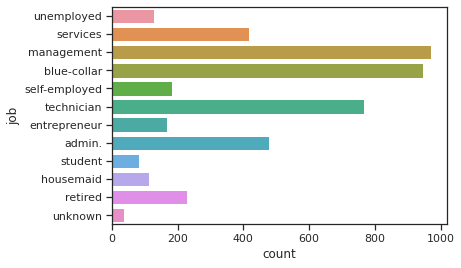

In [337]:
sns.set(style='ticks', color_codes=True)
sns.countplot(y='job', data=data)

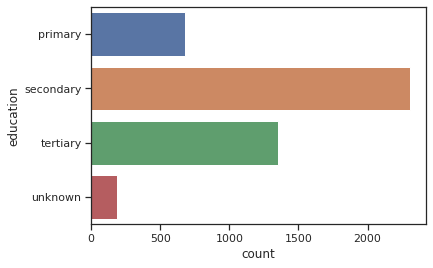

In [338]:
sns.countplot(y='education',data=data)

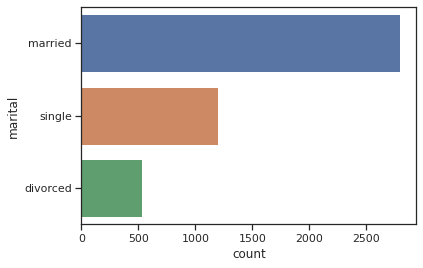

In [339]:
sns.countplot(y='marital', data=data)

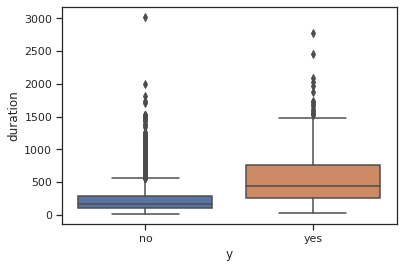

In [340]:
# outliers
sns.boxplot(x='y', y='duration', data=data)

In [341]:
# data = data[data.education != 'illiterate']
# data.describe()
# sns.boxplot(x='y',y='education',data=data)

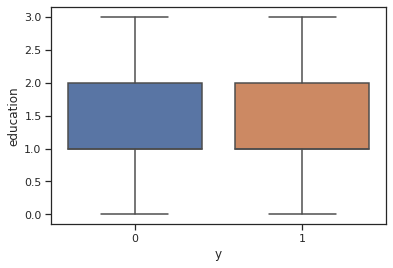

In [342]:
data = categorize(data)
# data['education'] = data['education'].apply(pd.to_numeric)
# data.describe()
sns.boxplot(x='y',y='education',data=data)

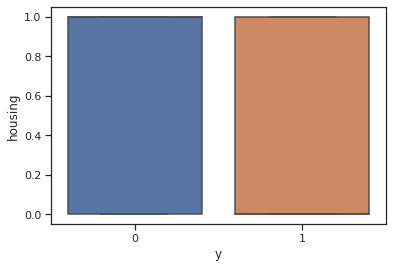

In [343]:
sns.boxplot(x='y',y='housing',data=data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


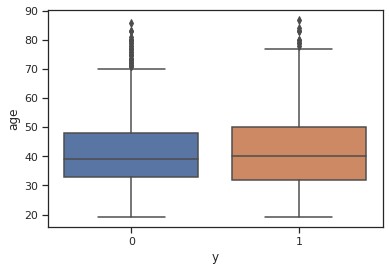

In [344]:
sns.boxplot(data['y'],data['age'])

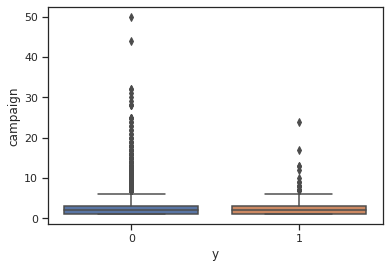

In [345]:
sns.boxplot(x='y',y='campaign',data=data)

In [346]:
def remove_outliers(df,column,minimum,maximum):
  col_values=df[column].values
  df[column]=np.where(np.logical_or(col_values<minimum,col_values>maximum),col_values.mean(), col_values)
  return df

In [347]:
min_val=data['duration'].min()
max_val=1500
data=remove_outliers(df=data, column='duration',minimum=min_val, maximum=max_val)

min_val = data["age"].min()
max_val = 80
data = remove_outliers(df=data, column='age' , minimum=min_val, maximum=max_val)

min_val = data["campaign"].min()
max_val = 6
data = remove_outliers(df=data, column='campaign' , minimum=min_val, maximum=max_val)

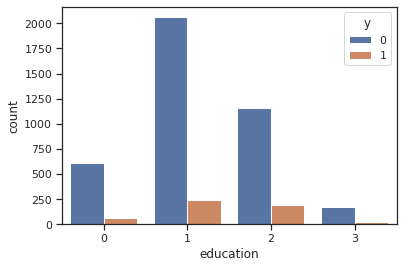

In [348]:
sns.countplot(x='education', hue='y',data=data)

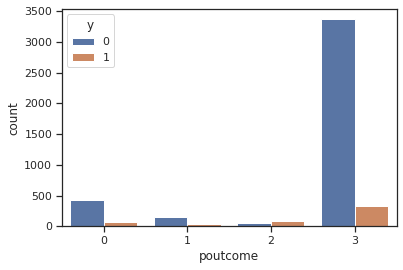

In [349]:
sns.countplot(x='poutcome',hue='y',data=data)

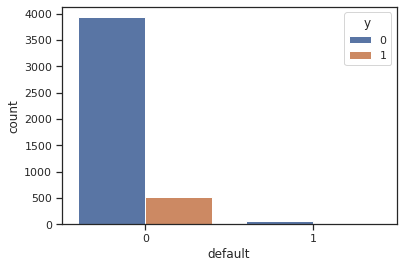

In [350]:
sns.countplot(x='default',hue='y',data=data)

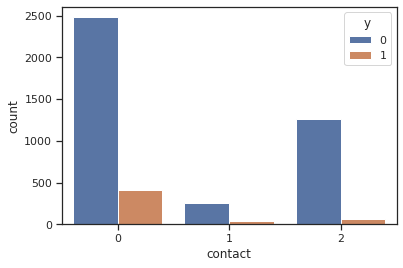

In [351]:
sns.countplot(x='contact',hue='y',data=data)

In [352]:
data = data.drop('poutcome',axis=1)
data=data.drop('default', axis=1)
data=data.drop('contact', axis=1)

In [353]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        4521 non-null   float64
 1   job        4521 non-null   int64  
 2   marital    4521 non-null   int64  
 3   education  4521 non-null   int64  
 4   balance    4521 non-null   int64  
 5   housing    4521 non-null   int64  
 6   loan       4521 non-null   int64  
 7   day        4521 non-null   int64  
 8   month      4521 non-null   int64  
 9   duration   4521 non-null   float64
 10  campaign   4521 non-null   float64
 11  pdays      4521 non-null   int64  
 12  previous   4521 non-null   int64  
 13  y          4521 non-null   int64  
dtypes: float64(3), int64(11)
memory usage: 494.6 KB


In [354]:
data.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,30.0,10,1,0,1787,0,0,18,10,79.0,1.0,-1,0,0
1,33.0,7,1,1,4789,1,1,10,8,220.0,1.0,339,4,0
2,35.0,4,2,2,1350,1,0,15,0,185.0,1.0,330,1,0
3,30.0,4,1,2,1476,1,1,2,6,199.0,4.0,-1,0,0
4,59.0,1,1,1,0,1,0,4,8,226.0,1.0,-1,0,0


In [356]:
X=data.drop('y',axis=1).values
y=data['y'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)

pca = PCA(n_components=10)
pca.fit(X_train)
X_train = pca.fit_transform(X_train)

X_train.shape

(3390, 10)

In [358]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decison-Tree', DecisionTreeClassifier()))
models.append(('Gaussian', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('RandForest',RandomForestClassifier(max_depth = 8, n_estimators = 120)))
models.append(('ADA', AdaBoostClassifier(n_estimators = 120)))

results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=42)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {}".format(name, cv_results.mean())
    print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


LR: 0.8843657817109145
LDA: 0.8811209439528025


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


KNN: 0.8849557522123893


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Decison-Tree: 0.8330383480825958
Gaussian: 0.8820058997050146


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


SVM: 0.8828908554572271


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


RandForest: 0.8861356932153391


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


ADA: 0.8817109144542773


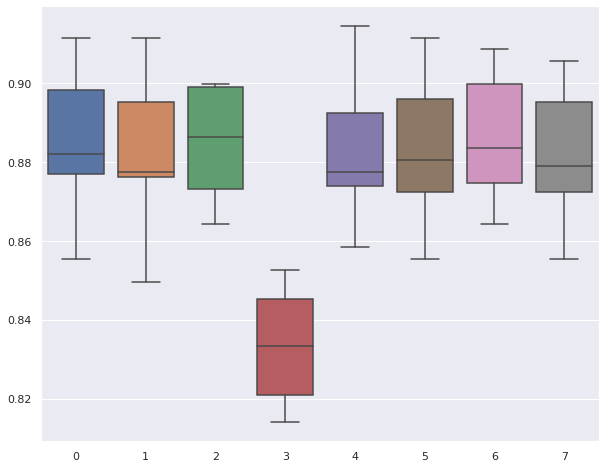

In [378]:
# for r in results:
#   print(r)
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(data=results)

In [385]:
scaler.fit(X_test)
X_test = scaler.fit_transform(X_test)

pca.fit(X_test)
X_test = pca.fit_transform(X_test)

lr = LogisticRegression()
# lr = GaussianNB()
# lr = DecisionTreeClassifier()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_test)
print("Accuracy : ", accuracy_score(Y_test, predictions))
print("Confusion Matrix : \n",confusion_matrix(Y_test, predictions))
print("Classification Report: \n",classification_report(Y_test, predictions))

Accuracy :  0.8815207780725022
Confusion Matrix : 
 [[997   9]
 [125   0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.99      0.94      1006
           1       0.00      0.00      0.00       125

    accuracy                           0.88      1131
   macro avg       0.44      0.50      0.47      1131
weighted avg       0.79      0.88      0.83      1131

